# Statistics in python (practical examples)

## Descriptive statistics
Some courses have not provided datasets directly, but I have made an attempt to get the data from the excel file, and to understand and perform the implementation as required.

In [ ]:
import numpy as np
from scipy import stats

In [ ]:
import pandas as pd

df = pd.read_csv('house.csv')


In [5]:
df.head()

,ID,Building,Year of sale,Month of sale,Type of property,Property #,Area (ft.),Price,Status,Unnamed: 9,...,Y,M,D,Gender,Country,State,Purpose,Deal satisfaction,Mortgage,Source
0,1030,1,2005.0,11.0,Apartment,30,743.09,"$2,46,172.68",Sold,NaN,...,1986.0,6.0,21.0,F,USA,California,Home,5.0,No,Website
1,1029,1,2005.0,10.0,Apartment,29,756.21,"$2,46,331.90",Sold,NaN,...,1983.0,2.0,24.0,F,USA,California,Home,5.0,No,Website
2,2002,2,2007.0,7.0,Apartment,2,587.28,"$2,09,280.91",Sold,NaN,...,1985.0,12.0,27.0,M,USA,California,Home,1.0,Yes,Client
3,2031,2,2007.0,12.0,Apartment,31,1604.75,"$4,52,667.01",Sold,NaN,...,1985.0,12.0,27.0,M,USA,California,Investment,3.0,Yes,Website
4,1049,1,2004.0,11.0,Apartment,49,1375.45,"$4,67,083.31",Sold,NaN,...,1979.0,5.0,15.0,F,USA,California,Home,4.0,No,Agency


In [6]:
print(df.columns)


Index(['ID', 'Building', 'Year of sale', 'Month of sale', 'Type of property',
       'Property #', 'Area (ft.)', 'Price', 'Status', 'Unnamed: 9',
       'Customer ID', 'Entity', 'Name', 'Surname', 'Age at time of purchase',
       'Interval', 'Y', 'M', 'D', 'Gender', 'Country', 'State', 'Purpose',
       'Deal satisfaction', 'Mortgage', 'Source'],
      dtype='object')


In [ ]:
price = (
    df['Price']
    .astype(str)
    .str.replace(',', '', regex=False)
    .str.replace('$', '', regex=False)
    .str.replace('€', '', regex=False)
    .str.strip()
)

price = pd.to_numeric(price, errors='coerce').dropna()
df['Price'] = price


In [21]:
area = pd.to_numeric(df['Area (ft.)'], errors='coerce')

# Keep valid pairs only
scatter_df = df.loc[price.notna() & area.notna(), :].copy()
scatter_df['Price'] = price[price.notna() & area.notna()]
scatter_df['Area'] = area[price.notna() & area.notna()]

df['Area (ft.)'] = area

Task 2: Create a frequency distribution graph (that is a histogram with the highest possible number of bins - 267). Use data on all properties, no matter if sold or not.

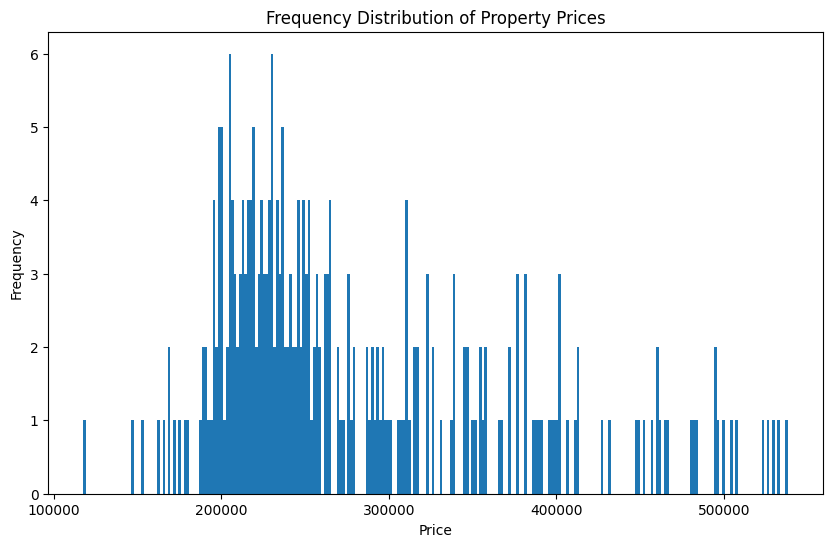

In [17]:
import matplotlib.pyplot as plt


price = pd.to_numeric(df['Price'], errors='coerce').dropna()

plt.figure(figsize=(10, 6))
plt.hist(price, bins=267)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Property Prices')

plt.show()


Task 3: Create a histogram which represents the Price variable. Choose interval width (bins) of length $100,000. If you don't know how to do that, refer to the Course notes on descriptive statistics provided with the first lecture in this section.

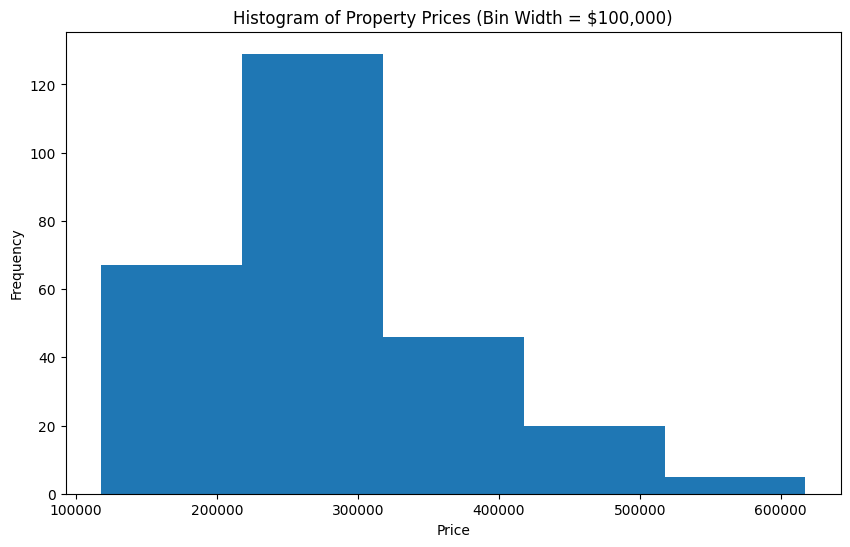

In [20]:
bin_width = 100_000
bins = np.arange(price.min(), price.max() + bin_width, bin_width)
plt.figure(figsize=(10, 6))
plt.hist(price, bins=bins)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Property Prices (Bin Width = $100,000)')

plt.show()


Task 5: Create a scatter plot showing the relationship between Price and Area. Use the data on all properties, no matter if sold or not. Interpret the results.

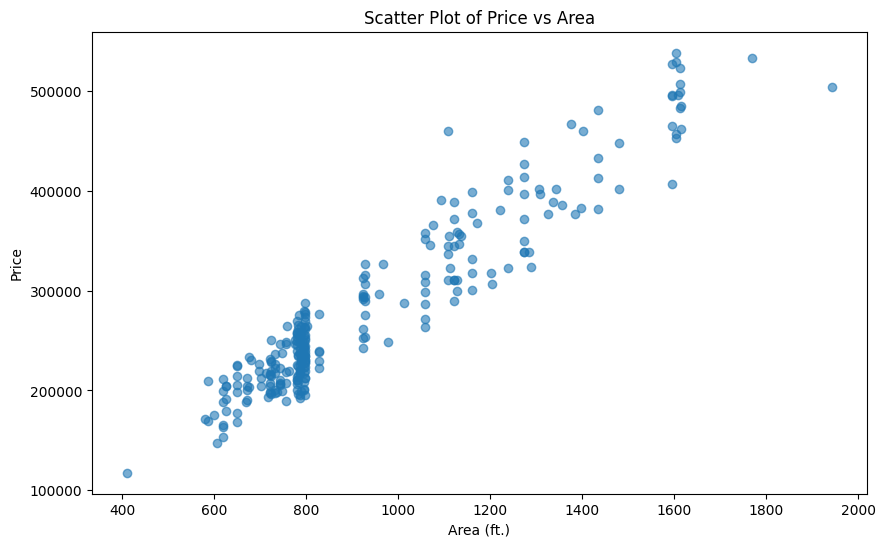

In [22]:
plt.figure(figsize=(10, 6))
plt.scatter(scatter_df['Area'], scatter_df['Price'], alpha=0.6)
plt.xlabel('Area (ft.)')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area')

plt.show()


strong linear relationship

Task 6: Create a frequency distribution table, where you list all the countries from which the company has buyers. Count the absolute frequency, the relative frequency and the cumulative frequency. 

In [25]:

country = df['Country'].dropna()
freq_table = country.value_counts().reset_index()
freq_table.columns = ['Country', 'Absolute Frequency']

freq_table['Relative Frequency'] = (
    freq_table['Absolute Frequency'] / freq_table['Absolute Frequency'].sum()
)

freq_table['Cumulative Frequency'] = freq_table['Absolute Frequency'].cumsum()
freq_table['Relative Frequency'] = freq_table['Relative Frequency'].round(4)

freq_table


,Country,Absolute Frequency,Relative Frequency,Cumulative Frequency
0,USA,165,0.8462,165
1,USA,12,0.0615,177
2,Canada,7,0.0359,184
3,Russia,4,0.0205,188
4,UK,2,0.0103,190
5,Belgium,2,0.0103,192
6,Denmark,1,0.0051,193
7,Germany,1,0.0051,194
8,Mexico,1,0.0051,195


Task 7: Create a Pareto diagram representing the data.

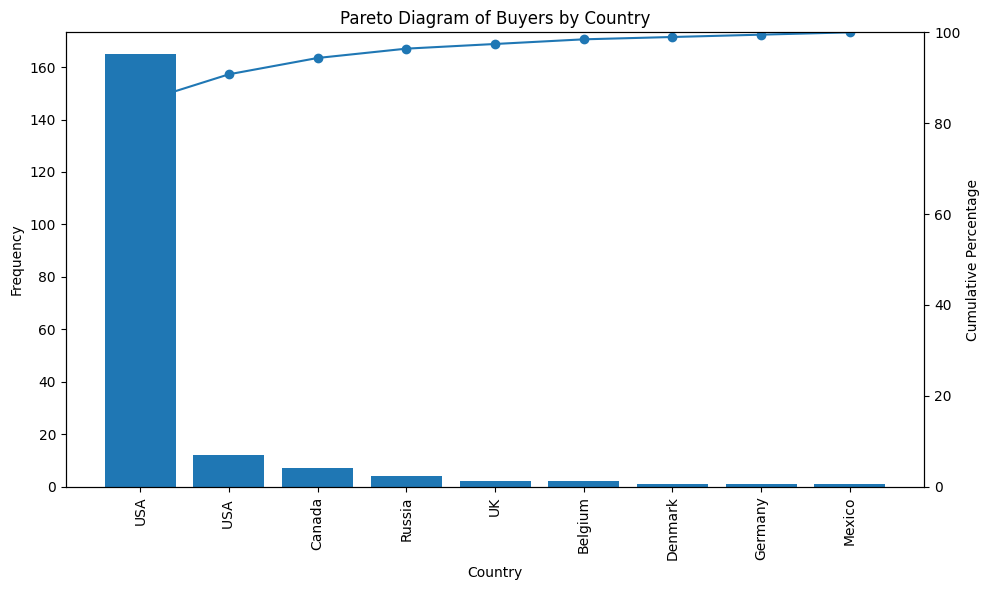

In [ ]:
freq = country.value_counts().reset_index()
freq.columns = ['Country', 'Frequency']

# Cumulative percentage
freq['Cumulative %'] = freq['Frequency'].cumsum() / freq['Frequency'].sum() * 100

# Plot Pareto diagram
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar chart
ax1.bar(freq['Country'], freq['Frequency'])
ax1.set_xlabel('Country')
ax1.set_ylabel('Frequency')
ax1.tick_params(axis='x', rotation=90)

# Line chart
ax2 = ax1.twinx()
ax2.plot(freq['Country'], freq['Cumulative %'], marker='o')
ax2.set_ylabel('Cumulative Percentage')
ax2.set_ylim(0, 100)

plt.title('Pareto Diagram of Buyers by Country')
plt.tight_layout()
plt.show()

Task 8: Calculate the mean, median, mode, skewness, variance and standard deviation of Price for all properties, no matter if sold or not.

In [28]:
mean_price = price.mean()
median_price = price.median()
mode_price = price.mode().iloc[0]
skewness_price = price.skew()
variance_price = price.var()
std_dev_price = price.std()

# Combine into a table
stats = pd.DataFrame({
    'Statistic': ['Mean', 'Median', 'Mode', 'Skewness', 'Variance', 'Standard Deviation'],
    'Value': [
        mean_price,
        median_price,
        mode_price,
        skewness_price,
        variance_price,
        std_dev_price
    ]
})

stats

,Statistic,Value
0,Mean,2.811719e+05
1,Median,2.490757e+05
2,Mode,4.600013e+05
3,Skewness,1.096015e+00
4,Variance,7.942218e+09
5,Standard Deviation,8.911912e+04


Task 10: Calculate the covariance and correlation coefficient between Price and Area, no matter if the property is sold or not. Is the result in line with the scatter plot?

In [29]:
data = pd.DataFrame({
    'Price': price,
    'Area': area
}).dropna()

# Covariance and correlation
covariance = data['Price'].cov(data['Area'])
correlation = data['Price'].corr(data['Area'])

covariance, correlation

(np.float64(24147707.28908277), np.float64(0.951087333679036))

## Hypothesis testing

In [91]:
df = pd.read_csv("hypothesis.csv")


In [93]:
# ---- STANDARDIZE COLUMN NAMES ----
df.columns = (
    df.columns
      .str.strip()
      .str.lower()
      .str.replace(" ", "_")
)

# ---- CLEAN AGE ----
df["age"] = pd.to_numeric(df["age"], errors="coerce")

# ---- CLEAN START DATE (handles ########) ----
df["start_date"] = pd.to_datetime(df["start_date"], errors="coerce")

# ---- CLEAN SALARY ($, commas, ########) ----
df["salary"] = (
    df["salary"]
      .astype(str)
      .str.replace(r"[^0-9.]", "", regex=True)
      .replace("", np.nan)
      .astype(float)
)

# ---- NORMALIZE CATEGORICAL COLUMNS ----
categorical_cols = [
    "gender", "country", "ethnicity",
    "department", "position"
]

for col in categorical_cols:
    if col in df.columns:
        df[col] = df[col].str.strip().str.title()

# ---- OPTIONAL: DROP ROWS MISSING CORE FIELDS ----
df = df.dropna(subset=["name", "department"])

# ---- FINAL CHECK ----
print(df.head())

      surname    name  age  gender        country ethnicity start_date  \
0  Sweetwater    Alex   51    Male  United States     White 2011-08-15   
1    Carabbio  Judith   30  Female  United States     White 2013-11-11   
2       Saada   Adell   31  Female  United States     White 2012-11-05   
3       Szabo  Andrew   34    Male  United States     White 2014-07-07   
4    Andreola   Colby   38  Female  United States     White 2014-11-10   

             department                      position    salary  
0  Software Engineering  Software Engineering Manager   56160.0  
1  Software Engineering             Software Engineer  116480.0  
2  Software Engineering             Software Engineer  102440.0  
3  Software Engineering             Software Engineer   99840.0  
4  Software Engineering             Software Engineer   99008.0  


In [94]:
print(df.columns)

Index(['surname', 'name', 'age', 'gender', 'country', 'ethnicity',
       'start_date', 'department', 'position', 'salary'],
      dtype='object')


In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t

df = df.copy()
df['salary'] = pd.to_numeric(df['salary'], errors='coerce')
df = df.dropna(subset=['salary', 'ethnicity'])

# --- Create White and Nonwhite groups  ---
white = df[df['ethnicity'] == 'White']['salary']
nonwhite = df[df['ethnicity'] != 'White']['salary']

# Sample sizes
n_w = len(white)
n_nw = len(nonwhite)

# Means
mean_w = white.mean()
mean_nw = nonwhite.mean()

# Sample variances 
var_w = white.var(ddof=1)
var_nw = nonwhite.var(ddof=1)

# --- Pooled variance (lecture formula) ---
sp2 = ((n_w - 1) * var_w + (n_nw - 1) * var_nw) / (n_w + n_nw - 2)

# --- T statistic ---
t_score = (mean_w - mean_nw) / np.sqrt(sp2 * (1/n_w + 1/n_nw))

# Degrees of freedom
dfree = n_w + n_nw - 2

# Two-tailed p-value
p_value = 2 * (1 - t.cdf(abs(t_score), df=dfree))

results = pd.DataFrame({
    'Group': ['White', 'Nonwhite'],
    'n': [n_w, n_nw],
    'Mean salary': [mean_w, mean_nw],
    'Sample variance': [var_w, var_nw]
})

print(results)
print('\nPooled variance:', sp2)
print('T-score:', t_score)
print('p-value:', p_value)

if p_value < 0.05:
    print('\nConclusion: Statistically significant pay gap based on race.')
else:
    print('\nConclusion: No statistically significant pay gap based on race.')


      Group    n   Mean salary  Sample variance
0     White  112  67323.100000     1.136728e+09
1  Nonwhite   62  70917.264516     1.225050e+09

Pooled variance: 1168051481.947337
T-score: -0.6643503862032863
p-value: 0.50735572845785

Conclusion: No statistically significant pay gap based on race.


## Regression analysis

In [100]:
df= pd.read_csv("car.csv")
df.head()

,Brand,Price,log_price,Mileage,log_mileage,EngineV,Year
0,Mercedes-Benz,"₹ 2,22,000.00",5.35,1,0.0,6.3,2016
1,Mercedes-Benz,"₹ 1,77,000.00",5.25,1,0.0,5.5,2016
2,Mercedes-Benz,"₹ 1,77,777.00",5.25,1,0.0,5.5,2016
3,Mercedes-Benz,"₹ 1,99,999.00",5.30,1,0.0,5.5,2016
4,Mercedes-Benz,"₹ 1,99,999.00",5.30,1,0.0,5.5,2016


In [ ]:
df.columns = (
    df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)

# -------------------------------
# Clean price column
# -------------------------------
df["price"] = (
    df["price"]
    .astype(str)
    .str.replace("₹", "", regex=False)
    .str.replace(",", "", regex=False)
    .str.strip()
)

# Convert to numeric (invalid → NaN)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

#  Remove rows with no price
df = df.dropna(subset=["price"])

# -------------------------------
# Mileage handling
# -------------------------------
#  Missing mileage → 0
df["mileage"] = pd.to_numeric(df["mileage"], errors="coerce").fillna(0)

# -------------------------------
# EngineV handling
# -------------------------------
df["enginev"] = pd.to_numeric(df["enginev"], errors="coerce")

#  Delete rows with NA enginev
df = df.dropna(subset=["enginev"])

#  Delete rows where enginev == 99.99
df = df[df["enginev"] != 99.99]

df = df.reset_index(drop=True)

df.head()

,brand,price,log_price,mileage,log_mileage,enginev,year
0,Mercedes-Benz,222000.0,5.346353,1,0.0,6.3,2016
1,Mercedes-Benz,177000.0,5.247973,1,0.0,5.5,2016
2,Mercedes-Benz,177777.0,5.249876,1,0.0,5.5,2016
3,Mercedes-Benz,199999.0,5.301028,1,0.0,5.5,2016
4,Mercedes-Benz,185555.0,5.268473,1,0.0,4.7,2016


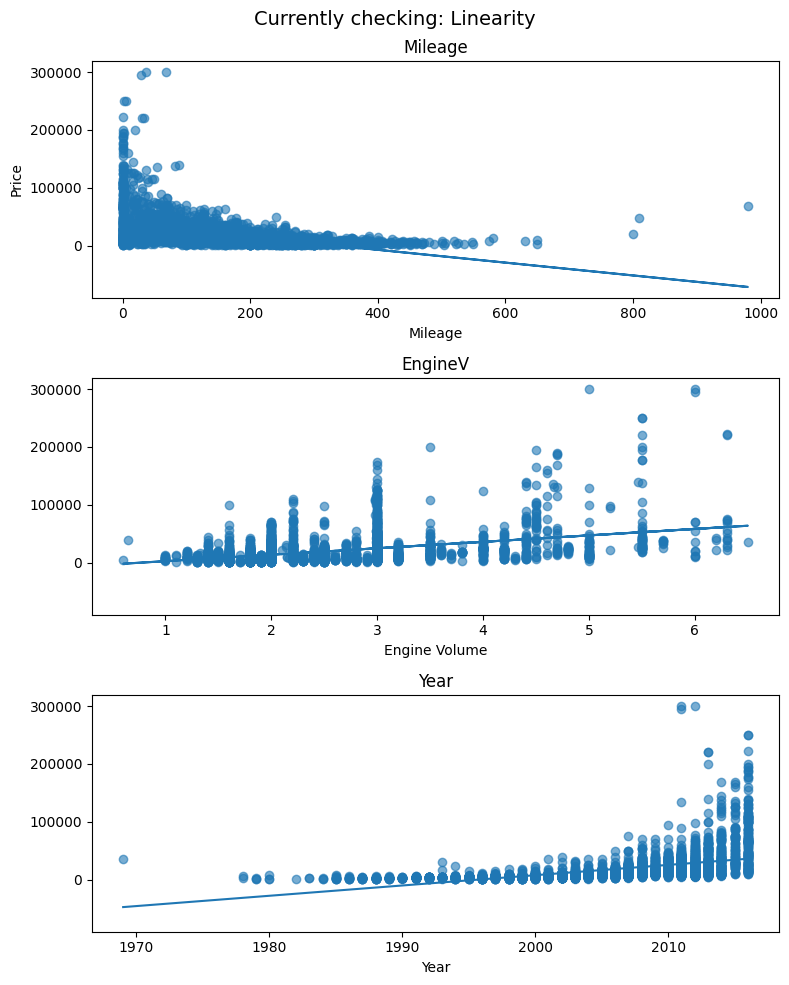

In [106]:
fig, axes = plt.subplots(3, 1, figsize=(8, 10), sharey=True)
# --------- 1. Mileage ---------
x = df["mileage"]
y = df["price"]

axes[0].scatter(x, y, alpha=0.6)
m, b = np.polyfit(x, y, 1)
axes[0].plot(x, m*x + b)

axes[0].set_title("Mileage")
axes[0].set_xlabel("Mileage")
axes[0].set_ylabel("Price")

# --------- 2. Engine Volume ---------
x = df["enginev"]
y = df["price"]

axes[1].scatter(x, y, alpha=0.6)
m, b = np.polyfit(x, y, 1)
axes[1].plot(x, m*x + b)

axes[1].set_title("EngineV")
axes[1].set_xlabel("Engine Volume")

# --------- 3. Year ---------
x = df["year"]
y = df["price"]

axes[2].scatter(x, y, alpha=0.6)
m, b = np.polyfit(x, y, 1)
axes[2].plot(x, m*x + b)

axes[2].set_title("Year")
axes[2].set_xlabel("Year")

plt.suptitle("Currently checking: Linearity", fontsize=14)
plt.tight_layout()
plt.show()

In [110]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

In [111]:
X = df["log_mileage"]
y = df["log_price"]

X = sm.add_constant(X)  # adds intercept

model = sm.OLS(y, X)
results = model.fit()


In [114]:
# Regression statistics
multiple_r = np.sqrt(results.rsquared)
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
std_error = np.sqrt(results.mse_resid)
n_obs = int(results.nobs)

# ANOVA
f_stat = results.fvalue
significance_f = results.f_pvalue

print("Regression Statistics")
print("Multiple R:", round(multiple_r, 3))
print("R Square:", round(r_squared, 3))
print("Adjusted R Square:", round(adj_r_squared, 3))
print("Standard Error:", round(std_error, 3))
print("Observations:", n_obs)

print("\nANOVA")
print("F-statistic:", round(f_stat, 3))
print("Significance F:", round(significance_f, 6))

print("\nCoefficients")
print(results.params)
print("\nP-values")
print(results.pvalues)



Regression Statistics
Multiple R: 0.503
R Square: 0.253
Adjusted R Square: 0.253
Standard Error: 0.345
Observations: 3924

ANOVA
F-statistic: 1331.001
Significance F: 0.0

Coefficients
const          4.746347
log_mileage   -0.330320
dtype: float64

P-values
const           0.000000e+00
log_mileage    3.567145e-251
dtype: float64


In [115]:
import numpy as np
import statsmodels.api as sm

df["log_price"] = np.log(df["price"])
df["log_enginev"] = np.log(df["enginev"])

X = sm.add_constant(df["log_enginev"])
y = df["log_price"]

model = sm.OLS(y, X)
results = model.fit()

# Regression statistics
multiple_r = np.sqrt(results.rsquared)
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
std_error = np.sqrt(results.mse_resid)
n_obs = int(results.nobs)

# ANOVA
f_stat = results.fvalue
significance_f = results.f_pvalue

print("Regression Statistics")
print("Multiple R:", round(multiple_r, 3))
print("R Square:", round(r_squared, 3))
print("Adjusted R Square:", round(adj_r_squared, 3))
print("Standard Error:", round(std_error, 3))
print("Observations:", n_obs)

print("\nANOVA")
print("F-statistic:", round(f_stat, 3))
print("Significance F:", round(significance_f, 6))

print("\nCoefficients")
print(results.params)
print("\nP-values")
print(results.pvalues)




Regression Statistics
Multiple R: 0.443
R Square: 0.196
Adjusted R Square: 0.196
Standard Error: 0.825
Observations: 3924

ANOVA
F-statistic: 955.713
Significance F: 0.0

Coefficients
const          8.418054
log_enginev    1.164627
dtype: float64

P-values
const           0.000000e+00
log_enginev    5.433010e-188
dtype: float64


In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm


# Log transforms
df["log_price"] = np.log(df["price"])
df["log_mileage"] = np.log(df["mileage"] + 1)

# Create brand dummies (drop one baseline brand)
brand_dummies = pd.get_dummies(df["brand"])
brand_dummies = brand_dummies.drop(columns=["Volkswagen"], errors="ignore")

# Combine dataframe
df = pd.concat([df, brand_dummies], axis=1)

# Define features (match Excel model)
X = df[
    [
        "log_mileage",
        "enginev",
        "year",
        "Audi",
        "BMW",
        "Mercedes-Benz",
        "Mitsubishi",
        "Renault",
        "Toyota"
    ]
]

# Add intercept
X = sm.add_constant(X)

# Target
y = df["log_price"]

# Run regression
X = X.astype(float)

model = sm.OLS(y, X)
results = model.fit()

print(results.summary())


print("\nRegression Statistics")
print("Multiple R:", round(np.sqrt(results.rsquared), 3))
print("R Square:", round(results.rsquared, 3))
print("Adjusted R Square:", round(results.rsquared_adj, 3))
print("Standard Error:", round(np.sqrt(results.mse_resid), 3))
print("Observations:", int(results.nobs))

print("\nANOVA")
print("F-statistic:", round(results.fvalue, 3))
print("Significance F:", round(results.f_pvalue, 6))

print("\nCoefficients")
print(results.params)

print("\nP-values")
print(results.pvalues)


                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     1708.
Date:                Fri, 02 Jan 2026   Prob (F-statistic):               0.00
Time:                        22:40:48   Log-Likelihood:                -2109.3
No. Observations:                3924   AIC:                             4239.
Df Residuals:                    3914   BIC:                             4301.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -177.7262      2.382    -74.611